In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,10

In [2]:
dataset = pd.read_csv('Cuaca_Juli.csv')
dataset.dropna(inplace=True)
dataset

,Tanggal,Suhu
0,2000-01-01,24
1,2000-01-02,25
2,2000-01-03,25
3,2000-01-04,25
4,2000-01-05,24
5,2000-01-06,23
6,2000-01-07,24
7,2000-01-08,22
8,2000-01-09,25
9,2000-01-10,26


In [3]:
dataset['Tanggal'] = pd.to_datetime(dataset['Tanggal'], infer_datetime_format = True)
indexedDataset = dataset.set_index(['Tanggal'])

In [4]:
from datetime import datetime
indexedDataset.head(5)

,Suhu
Tanggal,
2000-01-01,24
2000-01-02,25
2000-01-03,25
2000-01-04,25
2000-01-05,24


D:\Users\Irvin\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


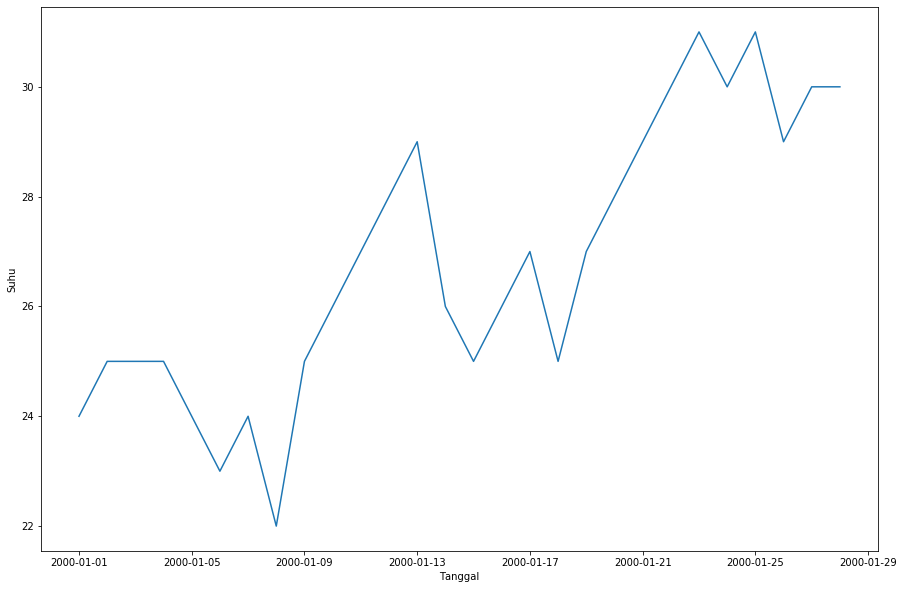

In [5]:
rcParams['figure.figsize'] = 15,10
plt.xlabel('Tanggal')
plt.ylabel('Suhu')
plt.plot(indexedDataset)

In [6]:
rolmean = indexedDataset.rolling(window = 7).mean()
rolstd = indexedDataset.rolling(window = 7).std()
print(rolmean, rolstd)

                 Suhu
Tanggal              
2000-01-01        NaN
2000-01-02        NaN
2000-01-03        NaN
2000-01-04        NaN
2000-01-05        NaN
2000-01-06        NaN
2000-01-07  24.285714
2000-01-08  24.000000
2000-01-09  24.000000
2000-01-10  24.142857
2000-01-11  24.428571
2000-01-12  25.000000
2000-01-13  25.857143
2000-01-14  26.142857
2000-01-15  26.571429
2000-01-16  26.714286
2000-01-17  26.857143
2000-01-18  26.571429
2000-01-19  26.428571
2000-01-20  26.285714
2000-01-21  26.714286
2000-01-22  27.428571
2000-01-23  28.142857
2000-01-24  28.571429
2000-01-25  29.428571
2000-01-26  29.714286
2000-01-27  30.000000
2000-01-28  30.142857                 Suhu
Tanggal             
2000-01-01       NaN
2000-01-02       NaN
2000-01-03       NaN
2000-01-04       NaN
2000-01-05       NaN
2000-01-06       NaN
2000-01-07  0.755929
2000-01-08  1.154701
2000-01-09  1.154701
2000-01-10  1.345185
2000-01-11  1.718249
2000-01-12  2.160247
2000-01-13  2.410295
2000-01-14  2.267787
2000

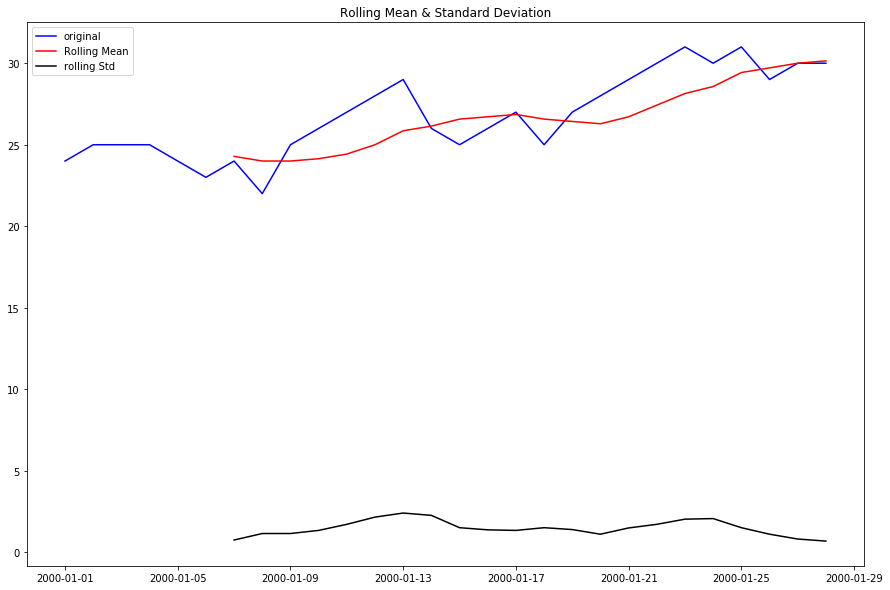

In [7]:
orig = plt.plot(indexedDataset, color='blue', label = 'original')
mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
std = plt.plot(rolstd, color = 'black', label = 'rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [8]:
from statsmodels.tsa.stattools import adfuller

print('Result of Dickey-Fuller Test:')
dftest = adfuller(indexedDataset['Suhu'], autolag = 'AIC')

dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Result of Dickey-Fuller Test:
Test Statistic                 -1.370858
p-value                         0.596165
#Lags Used                      0.000000
Number of Observations Used    27.000000
Critical Value (1%)            -3.699608
Critical Value (5%)            -2.976430
Critical Value (10%)           -2.627601
dtype: float64


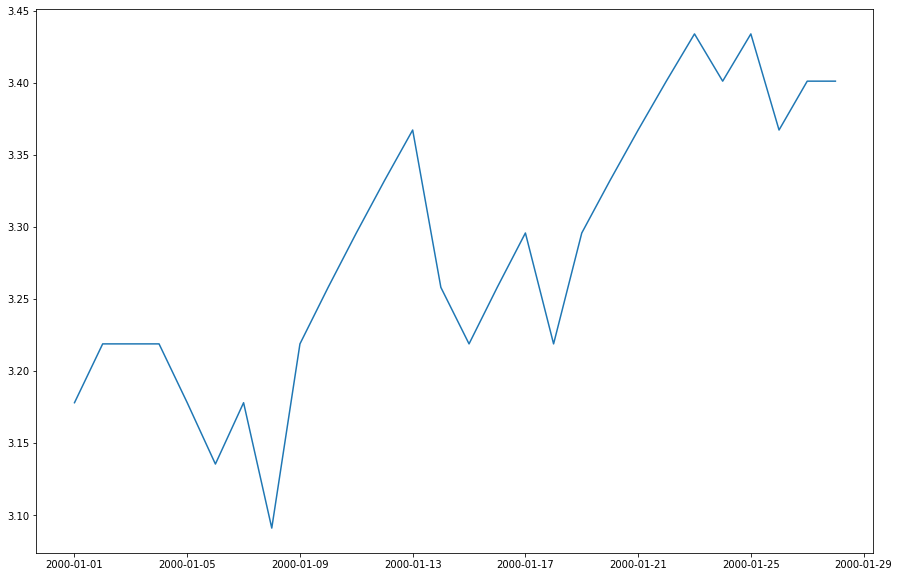

In [9]:
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

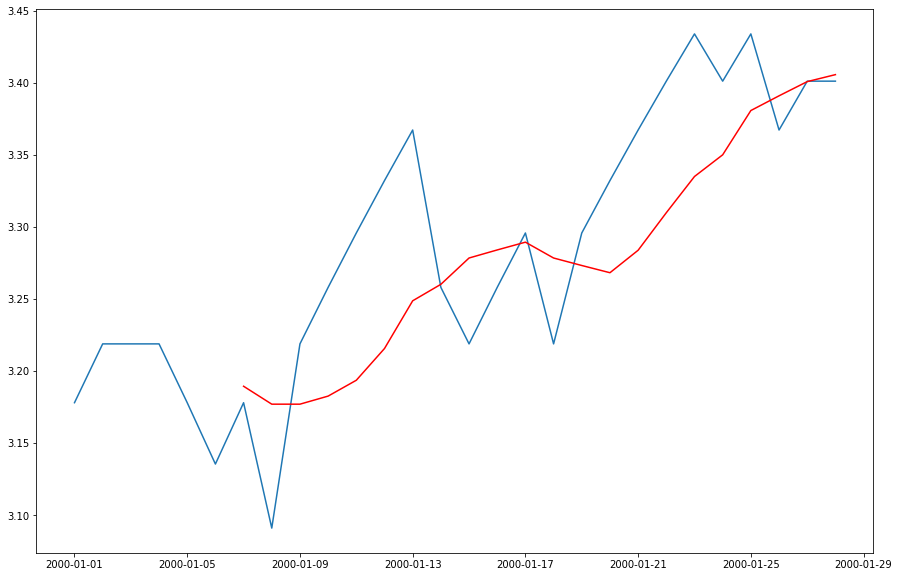

In [10]:
movingAverage = indexedDataset_logScale.rolling(window = 7).mean()
movingSTD = indexedDataset_logScale.rolling(window = 7).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color = 'red')

In [11]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(7)

datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,Suhu
Tanggal,
2000-01-07,-0.011415
2000-01-08,-0.085996
2000-01-09,0.041837
2000-01-10,0.075455
2000-01-11,0.102201
2000-01-12,0.116547
2000-01-13,0.118524
2000-01-14,-0.002110
2000-01-15,-0.059593


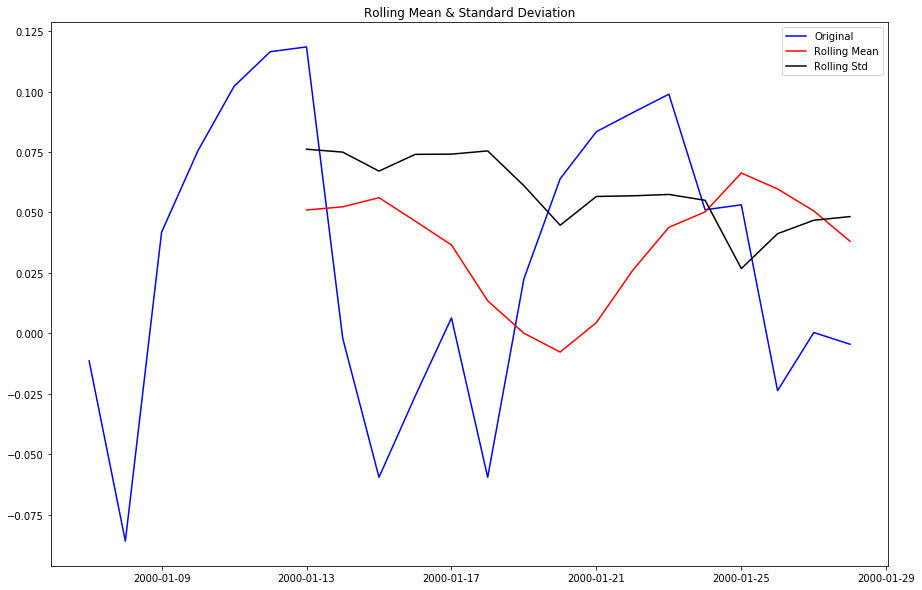

Result of Dickey-Fuller Test:
Test Statistic                 -1.370858
p-value                         0.596165
#Lags Used                      0.000000
Number of Observations Used    27.000000
Critical Value (1%)            -3.699608
Critical Value (5%)            -2.976430
Critical Value (10%)           -2.627601
dtype: float64


In [12]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    movingAverage = timeseries.rolling(window = 7).mean()
    movingSTD = timeseries.rolling(window = 7).std()
    
    orig = plt.plot(timeseries, color='blue',label = 'Original')
    mean = plt.plot(movingAverage, color = 'red',label = 'Rolling Mean')
    std = plt.plot(movingSTD, color = 'black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Result of Dickey-Fuller Test:')
    dftest = adfuller(indexedDataset['Suhu'], autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
test_stationarity(datasetLogScaleMinusMovingAverage)

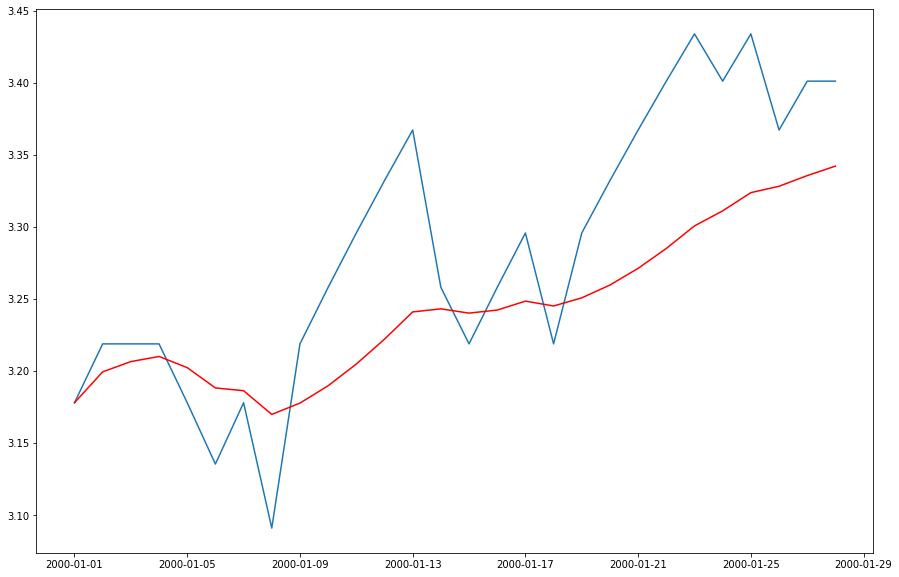

In [13]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=7, min_periods=0,adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage,color = 'red')

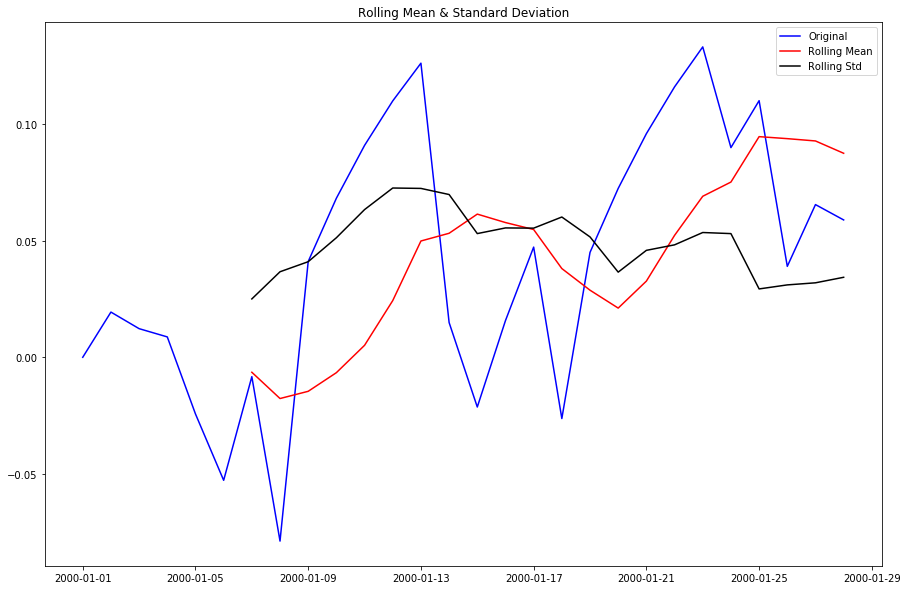

Result of Dickey-Fuller Test:
Test Statistic                 -1.370858
p-value                         0.596165
#Lags Used                      0.000000
Number of Observations Used    27.000000
Critical Value (1%)            -3.699608
Critical Value (5%)            -2.976430
Critical Value (10%)           -2.627601
dtype: float64


In [14]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

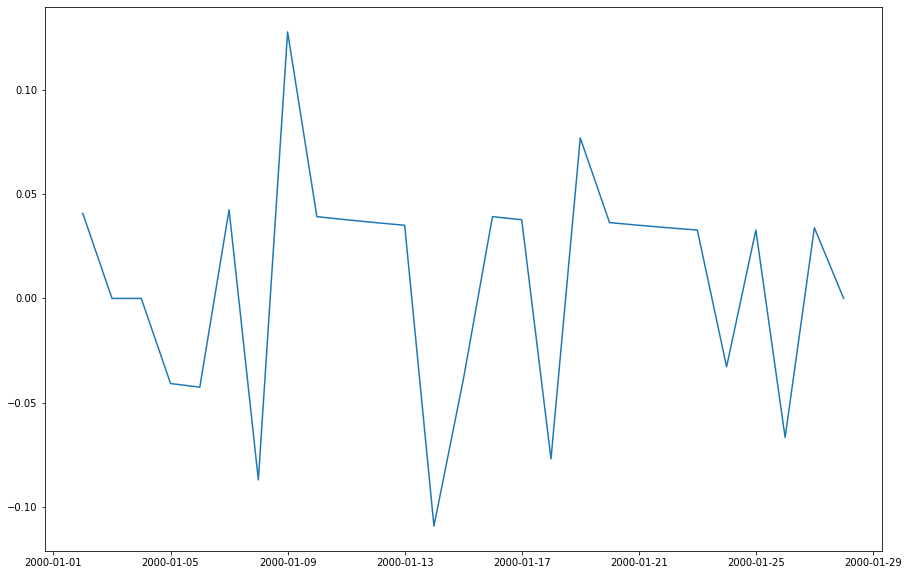

In [15]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

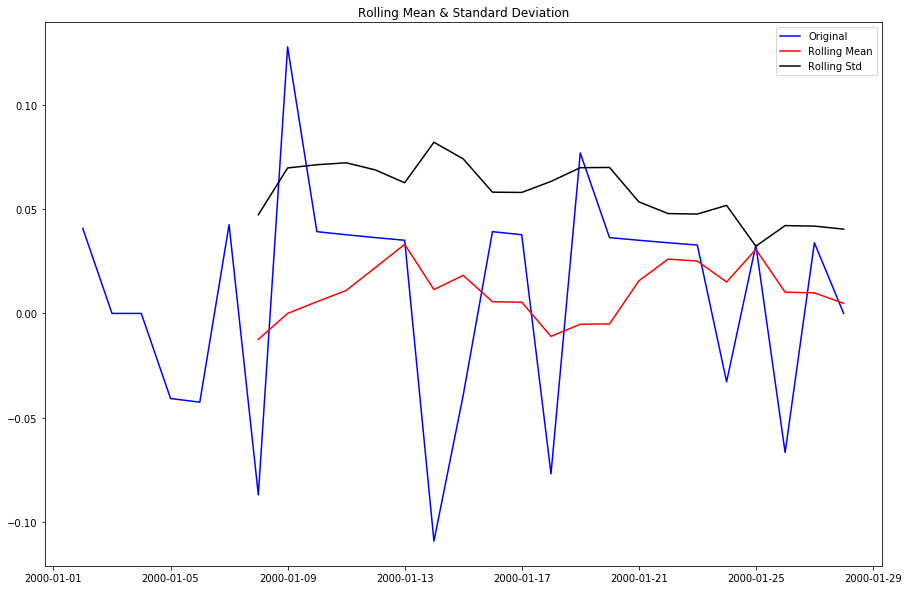

Result of Dickey-Fuller Test:
Test Statistic                 -1.370858
p-value                         0.596165
#Lags Used                      0.000000
Number of Observations Used    27.000000
Critical Value (1%)            -3.699608
Critical Value (5%)            -2.976430
Critical Value (10%)           -2.627601
dtype: float64


In [16]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

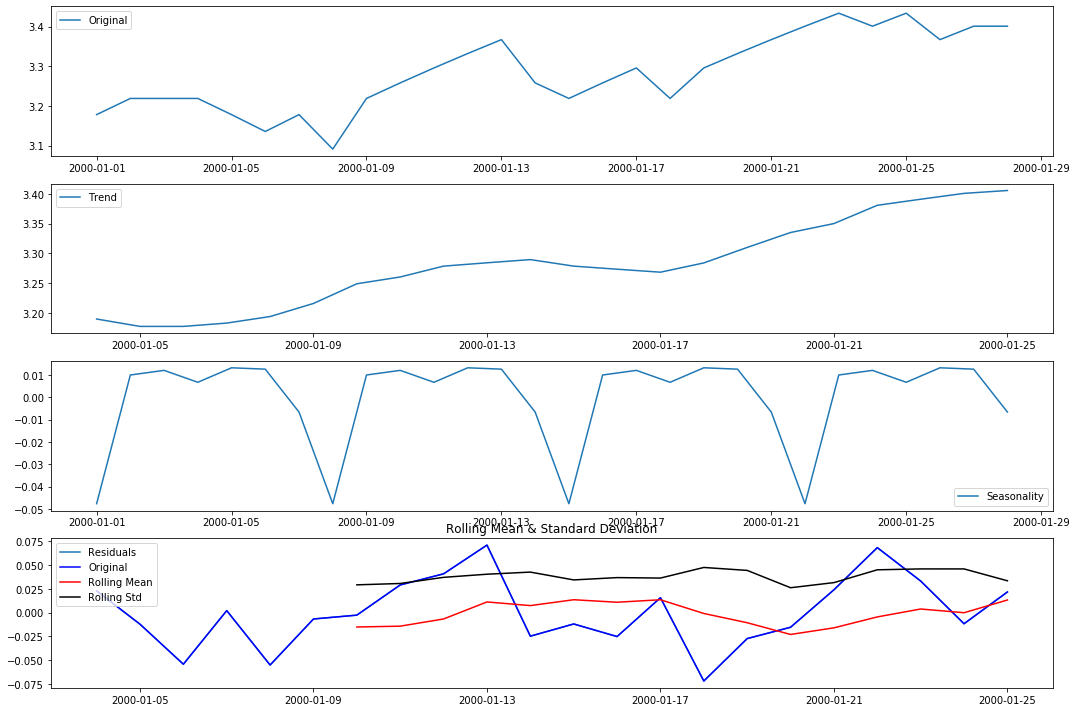

Result of Dickey-Fuller Test:
Test Statistic                 -1.370858
p-value                         0.596165
#Lags Used                      0.000000
Number of Observations Used    27.000000
Critical Value (1%)            -3.699608
Critical Value (5%)            -2.976430
Critical Value (10%)           -2.627601
dtype: float64


In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label = 'Original')
plt.legend(loc ='best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
test_stationarity(decomposedLogData)


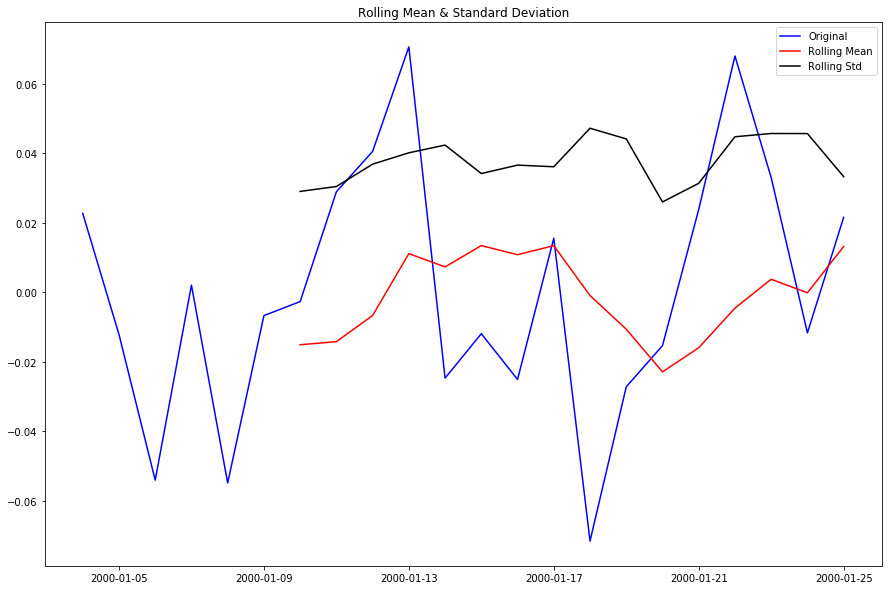

Result of Dickey-Fuller Test:
Test Statistic                 -1.370858
p-value                         0.596165
#Lags Used                      0.000000
Number of Observations Used    27.000000
Critical Value (1%)            -3.699608
Critical Value (5%)            -2.976430
Critical Value (10%)           -2.627601
dtype: float64


In [18]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

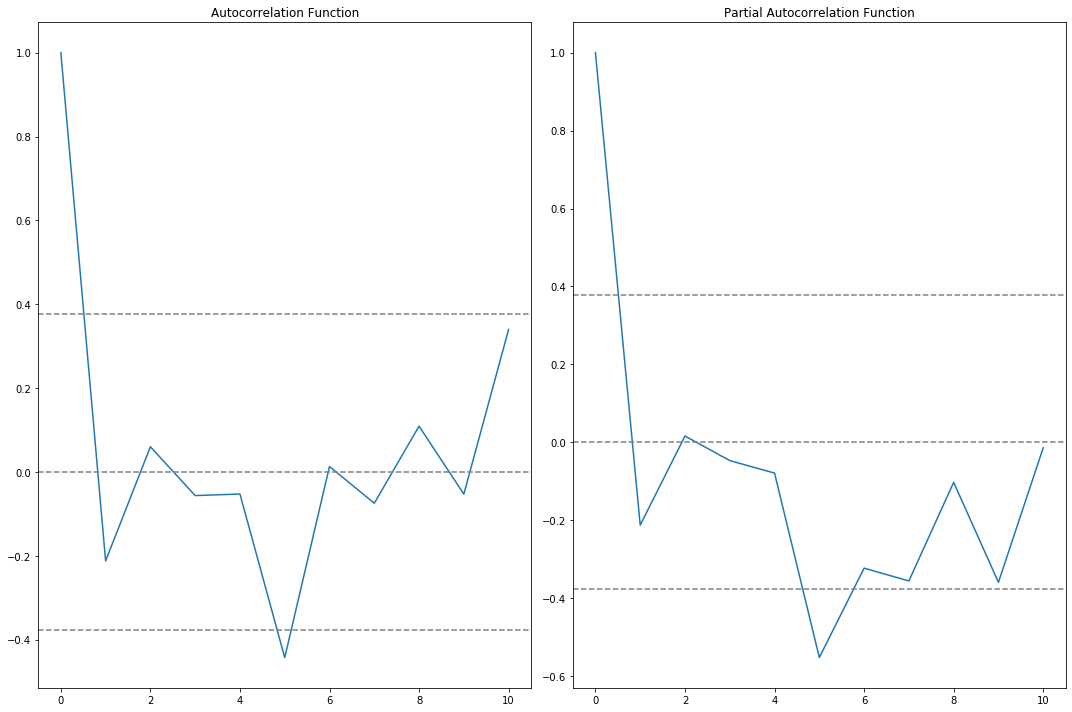

In [19]:
from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(datasetLogDiffShifting, nlags=10)
lag_pacf = pacf(datasetLogDiffShifting, nlags=10, method='ols')

#plot acf
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#plot pacf
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [20]:
lag_acf

array([ 1.        , -0.21223103,  0.06010709, -0.05636727, -0.05266267,
       -0.44267009,  0.01303638, -0.07469813,  0.10911987, -0.05295667,
        0.33984387])

In [393]:
indexedDataset_logScale

,Suhu
2000-01-01,3.178054
2000-01-02,3.218876
2000-01-03,3.218876
2000-01-04,3.218876
2000-01-05,3.178054
2000-01-06,3.135494
2000-01-07,3.178054
2000-01-08,3.091042
2000-01-09,3.218876
2000-01-10,3.258097


Text(0.5, 1.0, 'RSS: 0.0719')

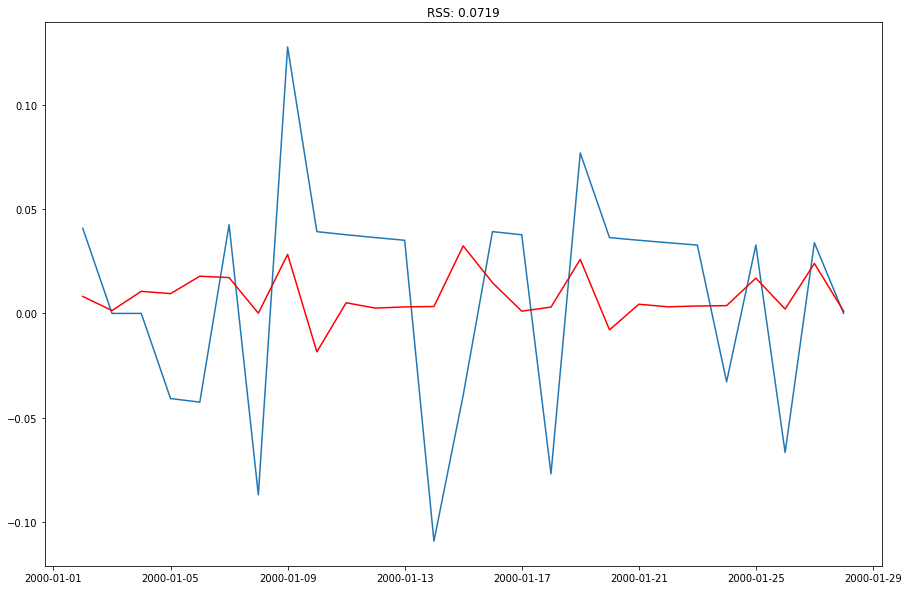

In [469]:
indexedDataset_logScale.index = pd.DatetimeIndex(indexedDataset_logScale.index.values,
                               freq=indexedDataset_logScale.index.inferred_freq)

 
            
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(indexedDataset_logScale, order=(1,1,1))
results_ARIMA = model.fit(disp = -1)

plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum ((results_ARIMA.fittedvalues - datasetLogDiffShifting["Suhu"])**2))

In [470]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

2000-01-02    0.008145
2000-01-03    0.001384
2000-01-04    0.010609
2000-01-05    0.009488
2000-01-06    0.017855
Freq: D, dtype: float64


In [471]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

2000-01-02    0.008145
2000-01-03    0.009529
2000-01-04    0.020138
2000-01-05    0.029626
2000-01-06    0.047481
Freq: D, dtype: float64


In [472]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['Suhu'].iloc[0], index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value = 0)
predictions_ARIMA_log.head()

2000-01-01    3.178054
2000-01-02    3.186199
2000-01-03    3.187583
2000-01-04    3.198192
2000-01-05    3.207680
Freq: D, dtype: float64

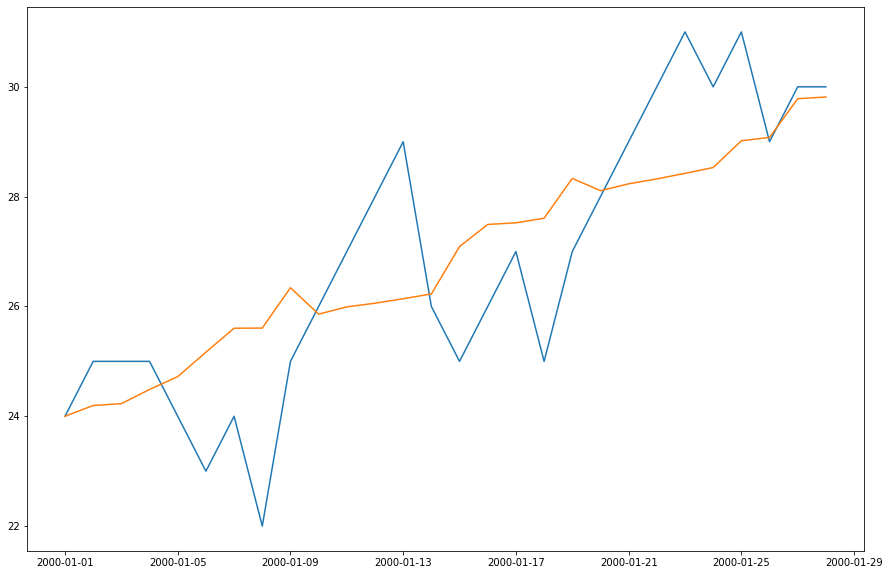

In [473]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

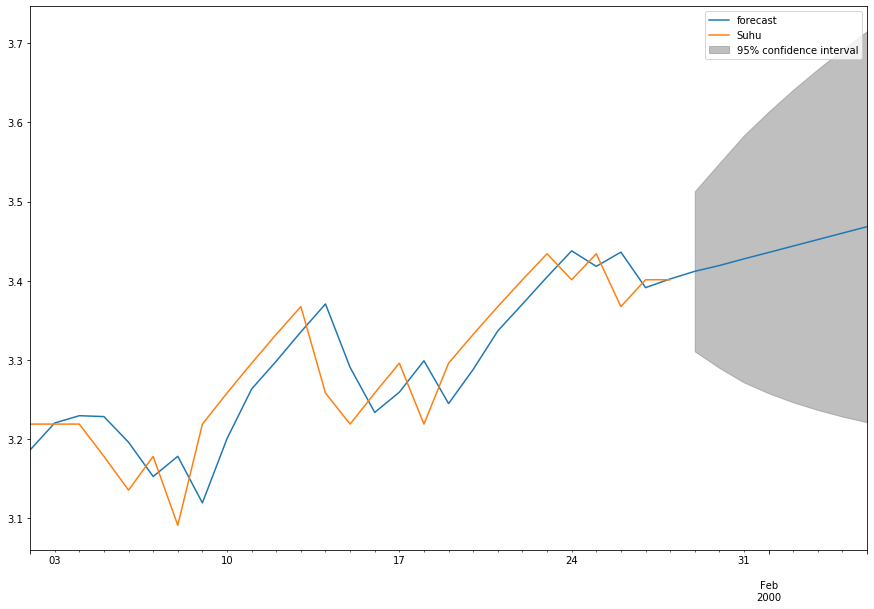

In [474]:
results_ARIMA.plot_predict(1,35)
x = results_ARIMA.forecast(steps=3)

In [475]:
results_ARIMA.forecast(steps=4)

(array([3.41184945, 3.41918426, 3.42759108, 3.43565146]),
 array([0.05159113, 0.06601667, 0.07964274, 0.09073105]),
 array([[3.3107327 , 3.5129662 ],
        [3.28979398, 3.54857455],
        [3.27149417, 3.58368798],
        [3.25782187, 3.61348105]]))

In [476]:
x[1]

array([0.05159113, 0.06601667, 0.07964274])

In [478]:
p29,p30,p31 = np.exp(3.41918426), np.exp(3.42759108),np.exp(3.43565146)
p29,p30,p31

(30.544488494605528, 30.802352902498505, 31.051634875855953)